# Projek Akhir Pengantar Sains Data
---
Kelompok 5 PSD A
Anggota:
- Riza Setiawan Soetedjo (195150207111062)
- Faiz Aulia Al Farisi (195150201111056)
- Alfonsus Avianto Chandrawan (195150201111006)

## Persiapan Environment

### Import Library

Melakukan import untuk library-library yang akan digunakan pada Colab ini

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report

### Extract Data

Proses untuk memasukkan dataset [Website Phising Dataset](https://www.kaggle.com/ahmednour/website-phishing-data-set) ke dalam Colab menggunakan API dari kaggle

In [2]:
key = {"username":"rizastwn","key":"0327b40f2fdff1517d37c62424548c47"}
with open('kaggle.json', 'w') as json_file:
    json.dump(key, json_file)

In [3]:
!pip install kaggle
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download ahmednour/website-phishing-data-set
!ls
!unzip \*.zip  && rm *.zip
!ls

rm: cannot remove '/root/.kaggle': No such file or directory
  0% 0.00/5.09k [00:00<?, ?B/s]
100% 5.09k/5.09k [00:00<00:00, 8.45MB/s]
kaggle.json  sample_data  website-phishing-data-set.zip
Archive:  website-phishing-data-set.zip
  inflating: Website Phishing.csv    
 kaggle.json   sample_data  'Website Phishing.csv'


## Identifikasi Awal

Proses yang meliputi identifikasi masalah, tujuannya, dan metode analitik yang diselesaikan

### Identifikasi Masalah

Permasalahan *phising* merupakan permasalahan yang penting dalam industri terutamanya *e-banking* dan *e-commerce* yang berhubungan dengan berbagai banyak transaksi dan pembayaran *online*. Hal ini dikarenakan penyerangan phising dapat membahayakan informasi personal seseorang atau sebuah perusahaan ataupun menyerang data yang dimilikinya. 

Menurut [APWG’s Phising Activity Trends Report for Q2 2021](https://docs.apwg.org/reports/apwg_trends_report_q2_2021.pdf), terdapat 222,127 website phising unik di bulan Juni 2021. Untuk mengatasi permasalahan tersebut, perlunya ada sistem otomatis yang dapat mengklasifikasi apakah suatu website merupakan website *phising* atau tidak berdasarkan berbagai fitur yang berhubungan dengan website *phishy* dan website *legitimate*.

### Metode Analitik yang akan Diselesaikan

Metode analitik yang akan diselesaikan pada masalah ini ada 2, yaitu 

- *Descriptive Analytics* yang mana hasilnya adalah sebuah laporan atau *dashboard* yang menunjukkan hasil *Exploratory Data Analysis* dan berbagai informasi tentang dataset menggunakan Google Data Studio

- *Predictive Analytics* yang mana hasilnya adalah sebuah model yang dapat mengklasifikasi apakah sebuah website tergolong sebagai website *legitimate*, *suspicious*, ataupun *phishy* berdasarkan beberapa fitur dari website tersebut.

## Deskripsi Data

Website Phising Dataset memiliki **9 fitur** dan **1 label** yang semuanya bertipe data **integer** dan merupakan data **kategorikal**. 

Terdapat 1353 website yang terkumpul dari berbagai sumber. Website *phishy* dikumpul dari arsip data [Phishtank](https://www.phishtank.com/) yang merupakan website komunitas gratis dimana pengguna dapat mengirim, memverifikasi, melacak, dan membagikan data *phising*. Sedangkan website *legitimate* dikumpul dari Yahoo dan menggunakan *script* web yang dibuat menggunakan PHP. Total data yang dikumpulkan adalah sebagai berikut:

- 548 website *legitimate*
- 103 website *suspicious*
- 702 website *phishy*

Pada cell di bawah, terdapat *data dictionary* atau kamus data yang akan menampilkan informasi umum untuk setiap fitur yang ada.

Data dictionary

| No. | Nama Fitur        | Tipe Data | Format Data                                                                                                                       | Deskripsi data                                                         | Contoh Data |
|-----|-------------------|-----------|-----------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------|-------------|
| 1.  | SFH               | int       |  1: Legit <br> 0: Suspicious (redirect ke domain lain)<br>-1: Phishy (about:blank atau kosong)                                    | Domain Form Handler ketika user submit informasi                       | 1           |
| 2.  | popUpWidnow       | int       |  1: Legit<br> 0: Suspicious (rightClick showing alert)<br>-1: Phishy (rightClick disabled)                                        | Menggunakan pop-up window untuk submit informasi                       | 1           |
| 3.  | SSLfinal_State    | int       |  1: Legit (memakai https, trusted issuer, dan age >= 2 years)<br> 0: Suspicious (memakai https, not trusted issuer)<br>-1: Phishy | Website menggunakan fake https protocol                                | 1           |
| 4.  | Request_URL       | int       |  1: Legit (request URL < 22%)<br> 0: Suspicious (request URL >= 22% && < 61%)<br>-1: Phishy                                       | Jika gambar atau video diload dari domain selain URL                   | 1           |
| 5.  | URL_of_Anchor     | int       |  1: Legit (URL anchor% <31%)<br> 0: Suspicious (URL anchor% >= 31% && <= 67%)<br>-1: Phishy                                       | Link dalam webpage menuju ke domain lain                               | 1           |
| 6.  | web_traffic       | int       |  1: Legit (rank < 150.000)<br> 0: Suspicious (rank > 150.000)<br>-1: Phishy                                                       | Ranking web traffic dari suatu web                                     | 1           |
| 7.  | URL_Length        | int       |  1: Legit (<54)<br> 0: Suspicious (>=54 && <= 75)<br>-1: Phishy (>75)                                                             | Panjang atau banyak karakter dari URL                                  | 1           |
| 8.  | age_of_domain     | int       | -1: Phishy <br>1: Legit (age <= 6 months)                                                                                          | Umur dari domain                                                       | 1           |
| 9.  | having_IP_Address | int       | 0: Phishy<br>1: Legit                                                                                                             | Domain name pada URL menggunakan IP Address                            | 1           |
| 10. | Result            | int       |  1: Legit<br> 0: Suspicious<br>-1: Phishy                                                                                         | Kelas yang menentukan apakah website itu legit, suspicious atau phishy | 1           |

## Exploratory Data Analysis

Dataset dimuat sebagai dataframe dengan menggunakan fungsi `read_csv()` dari library pandas

In [4]:
df = pd.read_csv("Website Phishing.csv")
df.head()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1


Mencetak nama kolom yang terdapat pada dataframe

In [5]:
print(df.columns)

Index(['SFH', 'popUpWidnow', 'SSLfinal_State', 'Request_URL', 'URL_of_Anchor',
       'web_traffic', 'URL_Length', 'age_of_domain', 'having_IP_Address',
       'Result'],
      dtype='object')


Fungsi `mappings()` berfungsi untuk memetakan setiap nilai pada masing-masing kolom ke keterangan yang sesuai. Hal ini dilakukan agar memudahkan visualisasi pada Exploratory Data Analysis tanpa mempengaruhi dataset yang asli.

In [6]:
def mappings(x, col_name, maps):
  return maps[col_name][x]

maps ={
    "SFH":{-1:"about:blank or empty", 0:"redirect to different domain", 1:"other"},
    "popUpWidnow":{-1:"rightClick disabled", 0:"rightClick showing alert", 1:"other"},
    "SSLfinal_State":{-1:"other", 0:"use https and not trusted issuer", 1:"use https, trusted issuer, and age >= 2 year"},
    "Request_URL":{-1:"other", 0:"22%<= req <61%", 1:"req <22%"},
    "URL_of_Anchor":{-1:"other", 0:"31%<= anchor <67%", 1:"anchor <31%"},
    "web_traffic":{-1:"other", 0:"rank > 150.000", 1:"rank < 150.000"},
    "URL_Length":{-1:"len >75", 0:"54<= len <=75", 1:"len <54"},
    "age_of_domain":{-1:"other", 1:"<=6 months"},
    "having_IP_Address":{0:"Use IP in URL", 1:"Not Use IP in URL"},
    "Result":{-1:"Phishy", 0:"Suspicious", 1:"Legitimate"}
}
df_eda = df.copy()
for x in df_eda.columns:
  df_eda[x] = df_eda[x].apply(mappings, args=(x, maps))
df_eda.head()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,other,rightClick disabled,"use https, trusted issuer, and age >= 2 year",other,other,rank < 150.000,len <54,<=6 months,Use IP in URL,Suspicious
1,about:blank or empty,rightClick disabled,other,other,other,rank > 150.000,len <54,<=6 months,Not Use IP in URL,Legitimate
2,other,rightClick disabled,use https and not trusted issuer,22%<= req <61%,other,rank > 150.000,len >75,<=6 months,Use IP in URL,Legitimate
3,other,rightClick showing alert,"use https, trusted issuer, and age >= 2 year",other,other,rank > 150.000,len <54,<=6 months,Use IP in URL,Suspicious
4,about:blank or empty,rightClick disabled,"use https, trusted issuer, and age >= 2 year",other,31%<= anchor <67%,rank > 150.000,len >75,<=6 months,Use IP in URL,Legitimate


Dataframe berukuran 1353 x 10 atau dengan kata lain terdapat 1353 baris serta 10 kolom

In [7]:
df_eda.shape

(1353, 10)

Cell ini akan mencetak deskripsi statistik dataframe. Dikarenakan `df` merupakan dataset yang asli dan bertipe numerik, fungsi `describe()` dari pandas menunjukkan informasi yang berhubungan dengan data numerik seperti banyak data, rata-rata, standar deviasi, min, max, kuartil, dan median.

In [8]:
df.describe()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
count,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000
mean,0.237990,-0.258684,0.327421,-0.223208,-0.025129,0.000000,-0.053215,0.219512,0.114560,-0.113821
std,0.916389,0.679072,0.822193,0.799682,0.936262,0.806776,0.762552,0.975970,0.318608,0.954773
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
25%,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Berbeda dengan dataset yang asli, `df_eda` yang telah disesuaikan untuk proses EDA telah bertipe data object atau string. Perlakuan fungsi `describe()` pandas untuk data bertipe string hanya menunjukkan banyak data, banyak data unik, kategori terbanyak dan frekuensinya.

In [9]:
df_eda.describe()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
count,1353,1353,1353,1353,1353,1353,1353,1353,1353,1353
unique,3,3,3,3,3,3,3,2,2,3
top,other,rightClick showing alert,"use https, trusted issuer, and age >= 2 year",other,other,rank > 150.000,54<= len <=75,<=6 months,Use IP in URL,Phishy
freq,767,639,751,617,610,473,563,825,1198,702


Cell ini mengecek apakah terdapat nilai yang null dengan menggunakan fungsi `isnull()`. Ternyata, tidak terdapat data yang null 

In [10]:
df_eda.isnull().any()

SFH                  False
popUpWidnow          False
SSLfinal_State       False
Request_URL          False
URL_of_Anchor        False
web_traffic          False
URL_Length           False
age_of_domain        False
having_IP_Address    False
Result               False
dtype: bool

Cell ini mengecek nilai unik yang terdapat pada masing-masing kolom. Hasil cell ini harusnya sesuai dengan mapping yang telah dilakukan pada dataset asli.

In [11]:
columns = df_eda.columns
values = {}
for col in columns:
  values[col] = np.unique(df_eda[col])
print(values)

{'SFH': array(['about:blank or empty', 'other', 'redirect to different domain'],
      dtype=object), 'popUpWidnow': array(['other', 'rightClick disabled', 'rightClick showing alert'],
      dtype=object), 'SSLfinal_State': array(['other', 'use https and not trusted issuer',
       'use https, trusted issuer, and age >= 2 year'], dtype=object), 'Request_URL': array(['22%<= req <61%', 'other', 'req <22%'], dtype=object), 'URL_of_Anchor': array(['31%<= anchor <67%', 'anchor <31%', 'other'], dtype=object), 'web_traffic': array(['other', 'rank < 150.000', 'rank > 150.000'], dtype=object), 'URL_Length': array(['54<= len <=75', 'len <54', 'len >75'], dtype=object), 'age_of_domain': array(['<=6 months', 'other'], dtype=object), 'having_IP_Address': array(['Not Use IP in URL', 'Use IP in URL'], dtype=object), 'Result': array(['Legitimate', 'Phishy', 'Suspicious'], dtype=object)}


Cell ini menghitung jumlah data pada masing-masing kelas. Jumlah data yang diberikan sesuai dengan jumlah data yang telah dijelaskan pada deskripsi data di cell sebelumnya.

In [12]:
df_eda['Result'].value_counts()

Phishy        702
Legitimate    548
Suspicious    103
Name: Result, dtype: int64

Cell ini melakukan visualisasi menggunakan diagram lingkaran untuk menampilkan proporsi dari data pada masing-masing kelas.

Dengan adanya visualisasi ini, diperoleh informasi bahwa data ini sangatlah *imbalance* yang mana banyak **data kategori *phishy* lebih dari setengah total data**, sedangkan **data kategori *suspicious* tidak lebih dari 10% dari total data**. 

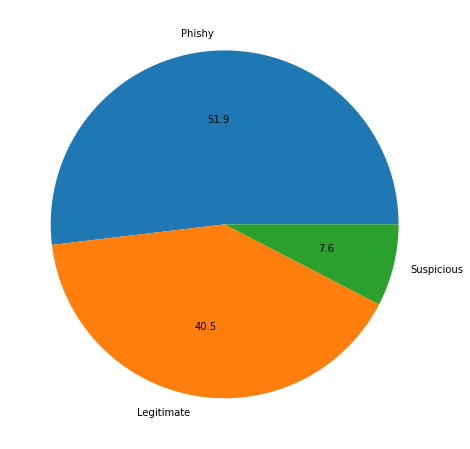

In [13]:
plt.figure(figsize=(10,8))
plt.pie(df_eda['Result'].value_counts(),autopct='%.1f',labels=df_eda['Result'].value_counts().keys())
plt.show()

Untuk keperluan dashboard, data `df_eda` dikonversi ke dalam format file excel

In [ ]:
df_eda.to_excel("dataset_eda.xlsx", index=False)

## Data Preparation

Untuk memudahkan proses pelatihan menggunakan library scikit-learn, label dipisah dari data dan disimpan dalam variabel `target`

In [14]:
target = df['Result']
df = df.drop('Result', axis=1)

Preprocessing yang digunakan pada fitur dataset adalah One-Hot Encoding agar representasi dari data kategorikal lebih ekspresif. One-Hot Encoding yang dibuat akan menyesuaikan berdasarkan dataset yang dimasukkan ke dalam fungsi `fit()`.

In [15]:
enc = OneHotEncoder()
enc.fit(df)

OneHotEncoder()

Untuk mengubah dataset berdasarkan penyesuaian sebelumnya, digunakanlah fungsi `transform()` dari One-Hot Encoding. Fungsi ini akan mengubah dataset dari DataFrame menjadi matriks.

Yang awalnya terdapat 9 kolom fitur, sekarang menjadi 25 kolom dikarenakan proses One-Hot Encoding

In [16]:
from sklearn.model_selection import train_test_split

x = enc.transform(df)
y = target.values
print(x.shape)

(1353, 25)


Melakukan *Oversampling* menggunakan SMOTE untuk mengatasi data yang imbalance. *Oversampling* adalah teknik untuk menyesuaikan distribusi dataset dengan menambahkan beberapa data acak dari kelas yang minoritas dan menambahkannya ke dataset.

Hasilnya adalah semua data kategori label di dalam dataset berjumlah 702. Sehingga total data dalam dataset menjadi 2106.

In [17]:
print("Jumlah nilai '1' sebelum SMOTE: {}".format(sum(y==1)))
print("Jumlah nilai '0' sebelum SMOTE: {}".format(sum(y==0)))
print("Jumlah nilai '-1' sebelum SMOTE: {} \n".format(sum(y==-1)))

sm = SMOTE(random_state=2)
x_res, y_res = sm.fit_resample(x, y)

print("Jumlah nilai '1' setelah SMOTE: {}".format(sum(y_res==1)))
print("Jumlah nilai '0' setelah SMOTE: {}".format(sum(y_res==0)))
print("Jumlah nilai '-1' setelah SMOTE: {}".format(sum(y_res==-1)))

Jumlah nilai '1' sebelum SMOTE: 548
Jumlah nilai '0' sebelum SMOTE: 103
Jumlah nilai '-1' sebelum SMOTE: 702 

Jumlah nilai '1' setelah SMOTE: 702
Jumlah nilai '0' setelah SMOTE: 702
Jumlah nilai '-1' setelah SMOTE: 702


Terakhir, **data dipisah menjadi tiga jenis yaitu data latih, data validasi, data uji**. Data latih digunakan untuk melatih model, data validasi digunakan untuk mendapatkan hyperparameter yang paling optimal, dan data uji berperan sebagai data asing bagi model untuk menguji apakah model yang dibuat memiliki akurasi yang baik atau tidak. **Data dibagi dengan perbandingan 60:20:20** yang mana data latih sebesar 60%, data validasi sebesar 20%, dan data uji sebesar 20%. Total terdapat 1263 baris data latih, 421 baris data validasi, dan 422 baris data uji.

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res , test_size=0.2, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=0)
print("Ukuran data latih:",x_train.shape)
print("Ukuran data validasi:",x_val.shape)
print("Ukuran data uji:",x_test.shape)

Ukuran data latih: (1263, 25)
Ukuran data validasi: (421, 25)
Ukuran data uji: (422, 25)


---

Bagian ini digunakan untuk menyimpan dataset yang telah dilakukan *preprocessing* menjadi satu file excel. Langkah-langkah yang dilakukan diulang dari proses One-Hot Encoding dikarenakan hasil One-Hot Encoding dari scikit-learn tidak dapat disimpan menjadi sebuah DataFrame sehingga perlu menggunakan fungsi `get_dummies()` dari Pandas untuk One-Hot Encodingnya.

In [ ]:
def simpanData(df,target):
  categorical = df.columns
  #One-Hot Encoding
  df = pd.get_dummies(data=df, columns=categorical)
  #SMOTE
  x, y = sm.fit_resample(df, target)
  #Split data
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
  x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=0)
  
  #Save to one Excel file
  writer = pd.ExcelWriter("dataset_preprocessed.xlsx", engine='openpyxl')
  x_train.to_excel(writer, sheet_name="data_latih" ,index=False)
  x_val.to_excel(writer, sheet_name="data_val" ,index=False)
  x_test.to_excel(writer, sheet_name="data_uji" ,index=False)
  y_train.to_excel(writer, sheet_name="label_latih" ,index=False)
  y_val.to_excel(writer, sheet_name="label_val" ,index=False)
  y_test.to_excel(writer, sheet_name="label_uji" ,index=False)
  writer.save()

simpanData(df,target)

##Data Modeling

###Random Forest Classifier
Random Forest digunakan karena secara general memiliki akurasi yang tinggi meskipun dataset berukuran besar, karena algoritma ini akan memilih fitur terbaik dalam prosesnya.

Tuning hyperparameter untuk model Random Forest Classifier dengan menggunakan GridSearch terhadap data validasi. GridSearch akan mencari semua kemungkinan dari pilihan yang diberikan. 

Hyperparameter yang di-tuning adalah `n_estimators` yang menandakan banyak decision tree, `criterion` yang menandakan criterion decision tree yang digunakan, `min_samples_split` yang menandakan nilai minimum untuk memisah node, dan `random_state` yang menentukan agar hasil randomnya selalu sama setiap eksekusi kodingan.

In [19]:
model = RandomForestClassifier()
grid = {'n_estimators':[50,100], 
        'criterion': ["gini", "entropy"],
        'min_samples_split': [2, 3, 4],
        'random_state':[1,51,101]}
clf = GridSearchCV(model, grid, scoring='accuracy')
clf.fit(x_val, y_val)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 100],
                         'random_state': [1, 51, 101]},
             scoring='accuracy')

In [ ]:
print(clf.best_params_)
print(clf.best_score_)

{'criterion': 'entropy', 'min_samples_split': 4, 'n_estimators': 50, 'random_state': 1}
0.9359663865546219


Berdasarkan hasil GridSearch diatas, diperoleh hyperparameter terbaik yaitu `criterion = entropy`, `min_samples_split = 4`, `n_estimators = 50`, dan `random_state=1` yang memberikan akurasi 93.6% pada data validasi.

Pembuatan model berdasarkan parameter terbaik & prediksi dengan _test data_

In [ ]:
model = RandomForestClassifier(criterion = clf.best_params_['criterion'], 
                               min_samples_split = clf.best_params_['min_samples_split'],
                               n_estimators = clf.best_params_['n_estimators'],
                               random_state = clf.best_params_['random_state'])
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print(json.dumps(model.get_params(), indent=2))

{
  "bootstrap": true,
  "ccp_alpha": 0.0,
  "class_weight": null,
  "criterion": "entropy",
  "max_depth": null,
  "max_features": "auto",
  "max_leaf_nodes": null,
  "max_samples": null,
  "min_impurity_decrease": 0.0,
  "min_samples_leaf": 1,
  "min_samples_split": 4,
  "min_weight_fraction_leaf": 0.0,
  "n_estimators": 50,
  "n_jobs": null,
  "oob_score": false,
  "random_state": 1,
  "verbose": 0,
  "warm_start": false
}


Evaluasi model Random Forest Classifier memberikan akurasi sebesar 92%. Hal ini mendekati dengan hasil GridSearch yaitu 93.6%

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          -1       0.92      0.89      0.90       135
           0       0.97      0.97      0.97       145
           1       0.88      0.91      0.90       142

    accuracy                           0.92       422
   macro avg       0.92      0.92      0.92       422
weighted avg       0.92      0.92      0.92       422



###Decision Tree
Decision Tree digunakan untuk membandingkan performa dengan Random Forest, dimana pada Decision Tree semua fitur akan digunakan (tidak ada _feature selection_).

Tuning hyperparameter untuk model Decision Tree Classifier dengan menggunakan GridSearch terhadap data validasi. GridSearch akan mencari semua kemungkinan dari pilihan yang diberikan. 

Hyperparameter yang di-tuning adalah `criterion` yang menandakan criterion decision tree yang digunakan, `splitter` yang menandakan metode yang digunakan untuk memisah node, `min_samples_split` yang menandakan nilai minimum untuk memisah node, dan `random_state` yang menentukan agar hasil randomnya selalu sama setiap eksekusi kodingan.

In [ ]:
model_DT = DecisionTreeClassifier()
grid_DT = {'criterion': ["gini", "entropy"],
        'splitter' : ["best", "random"],
        'min_samples_split': [2, 3, 4, 5, 6],
        'random_state':[1,51,101]}
clf_DT = GridSearchCV(model_DT, grid_DT, scoring='accuracy')
clf_DT.fit(x_val, y_val)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'random_state': [1, 51, 101],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
print(clf_DT.best_params_)
print(clf_DT.best_score_)

{'criterion': 'entropy', 'min_samples_split': 6, 'random_state': 1, 'splitter': 'random'}
0.9121848739495798


Berdasarkan hasil GridSearch diatas, diperoleh hyperparameter terbaik yaitu `criterion = entropy`, `min_samples_split = 6`, `splitter = random`, dan `random_state=1` yang memberikan akurasi 91.2% pada data validasi.

Pembuatan model berdasarkan parameter terbaik & prediksi dengan *test data*

In [ ]:
model_DT = DecisionTreeClassifier(criterion = clf_DT.best_params_['criterion'],
                                  splitter = clf_DT.best_params_['splitter'],  
                                  min_samples_split = clf_DT.best_params_['min_samples_split'],
                                  random_state = clf_DT.best_params_['random_state'])
model_DT.fit(x_train, y_train)
predictions_DT = model_DT.predict(x_test)
print(json.dumps(model_DT.get_params(), indent=2))

{
  "ccp_alpha": 0.0,
  "class_weight": null,
  "criterion": "entropy",
  "max_depth": null,
  "max_features": null,
  "max_leaf_nodes": null,
  "min_impurity_decrease": 0.0,
  "min_samples_leaf": 1,
  "min_samples_split": 6,
  "min_weight_fraction_leaf": 0.0,
  "random_state": 1,
  "splitter": "random"
}


Evaluasi model Decision Tree memberikan akurasi sebesar 90%. Hal ini mendekati dengan hasil GridSearch yaitu 91.2%

In [ ]:
print(classification_report(y_test, predictions_DT))

              precision    recall  f1-score   support

          -1       0.91      0.85      0.88       135
           0       0.92      0.99      0.96       145
           1       0.88      0.86      0.87       142

    accuracy                           0.90       422
   macro avg       0.90      0.90      0.90       422
weighted avg       0.90      0.90      0.90       422



###Support Vector Classifier
Support Vector Classifier digunakan karena secara general merupakan _classifier_ yang memiliki performa sangat baik (head to head dengan Random Forest).

Tuning hyperparameter untuk model Support Vector Classifier dengan menggunakan GridSearch terhadap data validasi. GridSearch akan mencari semua kemungkinan dari pilihan yang diberikan. 

Hyperparameter yang di-tuning adalah `C` yang menandakan parameter regularisasi, `kernel` yang menandakan tipe kernel yang digunakan pada SVC, `gamma` yang menandakan nilai koefisien kernel, dan `random_state` yang menentukan agar hasil randomnya selalu sama setiap eksekusi kodingan.

In [ ]:
model_SVC = SVC()
grid_SVC = {'C': [0.1, 1, 10, 100],
        'kernel' : ["rbf", "poly", "sigmoid", "linear"],
        'gamma' : [1, 0.1, 'scale', 'auto'],
        'random_state':[1,51,101]}
clf_SVC = GridSearchCV(model_SVC, grid_SVC, scoring='accuracy')
clf_SVC.fit(x_val, y_val)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 'scale', 'auto'],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
                         'random_state': [1, 51, 101]},
             scoring='accuracy')

In [ ]:
print(clf_SVC.best_params_)
print(clf_SVC.best_score_)

{'C': 100, 'gamma': 'auto', 'kernel': 'poly', 'random_state': 1}
0.9359663865546219


Berdasarkan hasil GridSearch diatas, diperoleh hyperparameter terbaik yaitu `C = 100`, `kernel = poly`, `gamma = auto`, dan `random_state=1` yang memberikan akurasi 93.6% pada data validasi.

Pembuatan model berdasarkan parameter terbaik & prediksi dengan *test data*

In [ ]:
model_SVC = SVC(gamma=clf_SVC.best_params_['gamma'], 
                C=clf_SVC.best_params_['C'], 
                kernel=clf_SVC.best_params_['kernel'],
                random_state = clf_SVC.best_params_['random_state'])
model_SVC.fit(x_train, y_train)
predictions_SVC = model_SVC.predict(x_test)
print(json.dumps(model_SVC.get_params(), indent=2))

{
  "C": 100,
  "break_ties": false,
  "cache_size": 200,
  "class_weight": null,
  "coef0": 0.0,
  "decision_function_shape": "ovr",
  "degree": 3,
  "gamma": "auto",
  "kernel": "poly",
  "max_iter": -1,
  "probability": false,
  "random_state": 1,
  "shrinking": true,
  "tol": 0.001,
  "verbose": false
}


Evaluasi model Support Vector Classifier memberikan akurasi sebesar 93%. Hal ini mendekati dengan hasil GridSearch yaitu 93.6%

In [ ]:
print(classification_report(y_test, predictions_SVC))

              precision    recall  f1-score   support

          -1       0.94      0.86      0.90       135
           0       0.95      1.00      0.98       145
           1       0.90      0.92      0.91       142

    accuracy                           0.93       422
   macro avg       0.93      0.93      0.93       422
weighted avg       0.93      0.93      0.93       422

